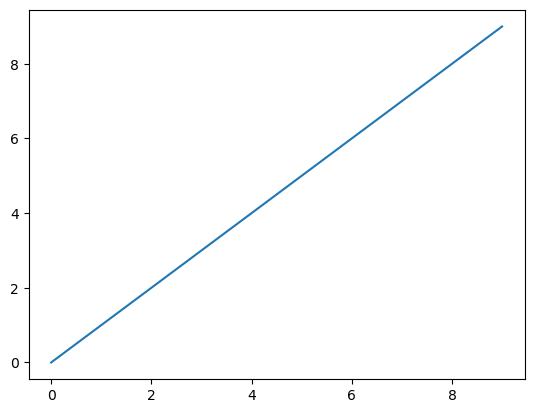

In [1]:
#import packages.
#Note that if you get an error when importing saphires that certain packages are not found,
#you'll need to pip install them as well
import numpy as np
import os
from scipy.optimize import curve_fit
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.ndimage import gaussian_filter
import scipy
%matplotlib inline
from scipy.integrate import quad
x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()

In [2]:
#Constants
R_coude = 60000.0 #spectral resolution of the Coude.
c = (2.9979245*10**5) #speed of light

In [10]:
#.dat file extraction, checks .p
star = "29Dra"#V846Her
folder_path = 'C:/Users/Jonah/Astro/Stars/DATA/stars/' + star  # Change this to the path of your folder
name = "_coude_head.dat"    
starpath = str(folder_path+"/"+star+name)    
print(starpath)

def is_float(string):
    #True if given string is float else False
    try:
        return float(string)
    except ValueError:
        return False

stardata = []
with open(starpath, 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split(",")
        stardata.append([float(i) if is_float(i) else i for i in k])
stardata = np.array(stardata, dtype='O')

print(stardata)
print(len(stardata))
'''
stardata = np.delete(stardata, [5])
print(stardata)
print(len(stardata))  #only for brute force file removal, in conjunction with above removal
#Need to remove both files to make sure rest of data is fine/lined up - remove from .p array, then remove from .dat array'''
print()

C:/Users/Jonah/Astro/Stars/DATA/stars/29Dra/29Dra_coude_head.dat
[list(['#Name', 'Tele', 'DATE-OBS', 'EXPTIME', 'BJD', 'BVCORR'])
 list(['29Dra_2021-05-03_0.pkl', 'mcdonald', '2021-05-03T10:24:50.652', '0', 356.585, 2459337.934332389, -3.821])
 list(['29Dra_2021-07-07_0.pkl', 'mcdonald', '2021-07-07T04:42:24.754', 1.0, 149.288, 2459402.696099308, -0.04])
 list(['29Dra_2021-07-08_0.pkl', 'mcdonald', '2021-07-08T05:13:16.534', 2.0, 27.009, 2459403.7175322706, 0.015])
 list(['29Dra_2021-08-26_0.pkl', 'mcdonald', '2021-08-26T03:00:17.547', 3.0, 203.193, 2459452.6254662015, 3.005])
 list(['29Dra_2021-08-27_0.pkl', 'mcdonald', '2021-08-27T02:27:38.824', 4.0, 92.288, 2459453.6028061365, 3.064])]
6



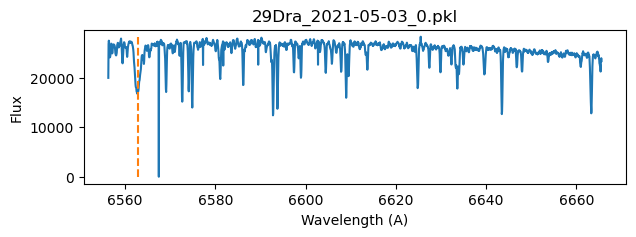

minimum: 16704.087146894497
maximum: 27892.86933192224
mean 24028.173568457605
min diff 7324.086421563108
max diff 3864.695763464635
min
inc (array([115], dtype=int64),)
loc 6562


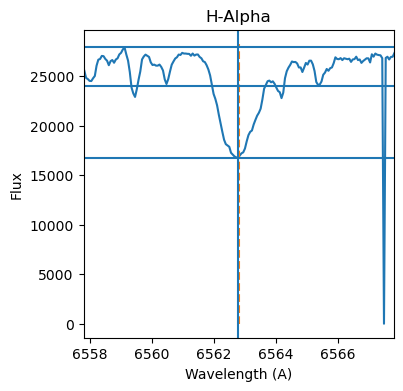

Guess = [7574.086421563108, 6562, 1, 24278.173568457605]
popt = [4.85868788e+03 6.56039822e+03 9.37792588e-01 2.22560763e+04]


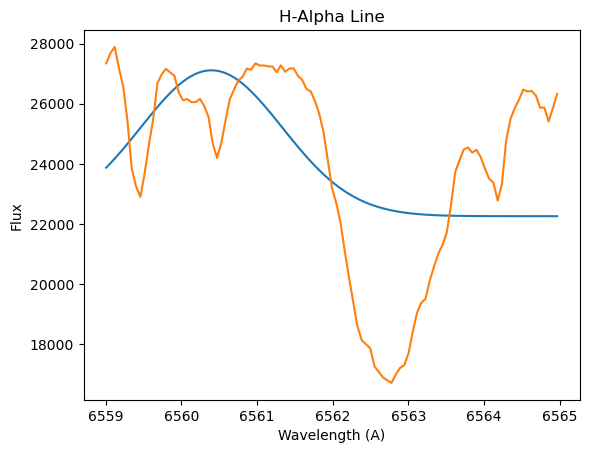

mu_obs = 6560.398223651397
z = -0.00036596823742968886
v = -109.71727758142072
B = 22256.076256487744
EW_Ha = -0.496266734479196

--------------------------------------------------------------------------


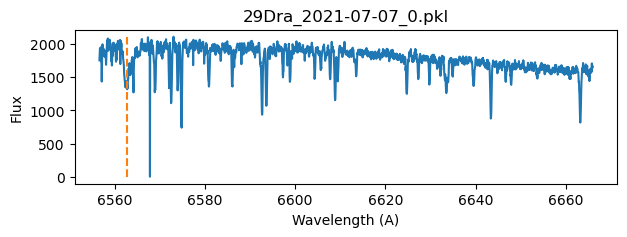

minimum: 1271.8315531123744
maximum: 2064.08052515532
mean 1764.3690723560203
min diff 492.5375192436459
max diff 299.7114527992999
min
inc (array([134], dtype=int64),)
loc 6564


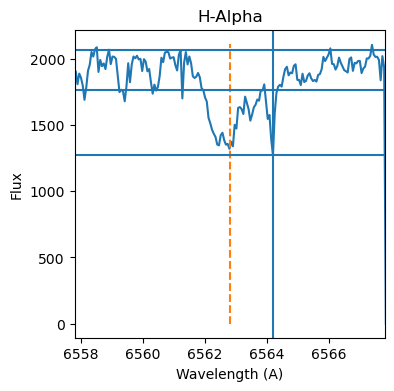

Guess = [742.5375192436459, 6564, 1, 2014.3690723560203]
popt = [-4.89637874e+02  6.56293241e+03  7.98684203e-01  1.92662293e+03]


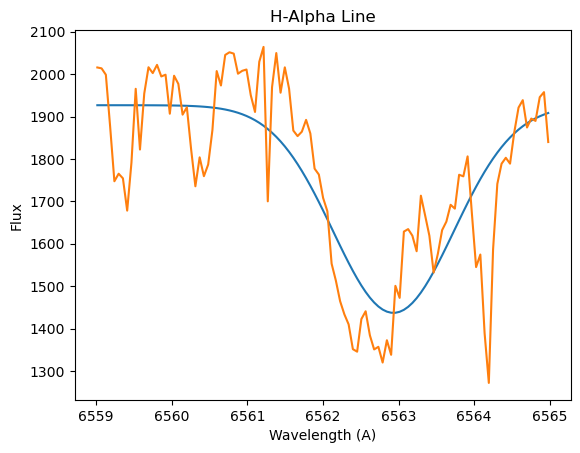

mu_obs = 6562.932407278621
z = 2.0175424913303903e-05
v = 6.04859238900851
B = 1926.622929386368
EW_Ha = 0.5025497397476091

--------------------------------------------------------------------------


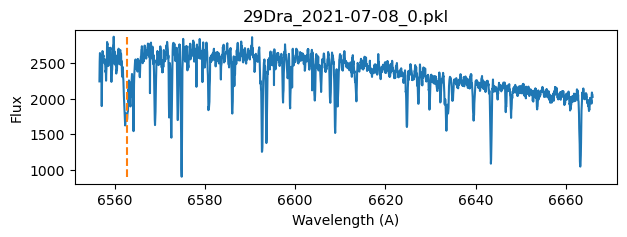

minimum: 1545.0442450058138
maximum: 2868.1490226415235
mean 2304.9380164067015
min diff 759.8937714008878
max diff 563.211006234822
min
inc (array([134], dtype=int64),)
loc 6564


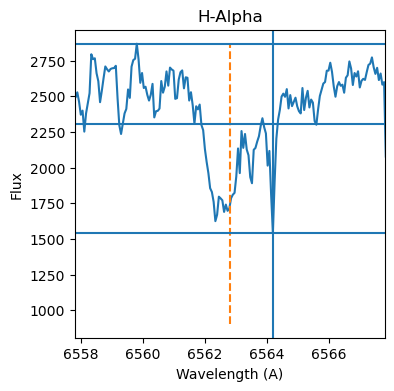

Guess = [1009.8937714008878, 6564, 1, 2554.9380164067015]
popt = [-7.41318174e+02  6.56290918e+03  8.70222376e-01  2.57156618e+03]


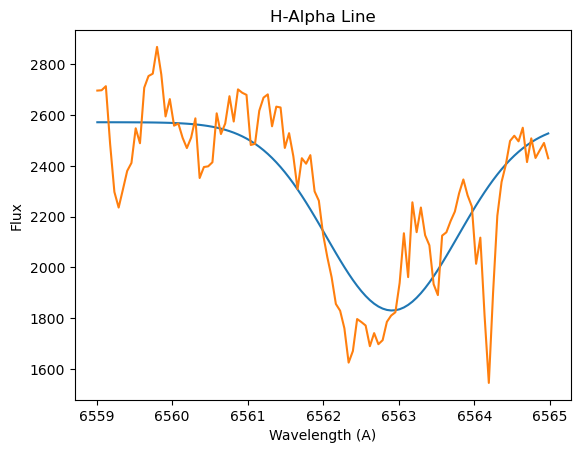

mu_obs = 6562.909175860187
z = 1.6635561069505617e-05
v = 4.987341208637784
B = 2571.5661770659412
EW_Ha = 0.6152720299209231

--------------------------------------------------------------------------


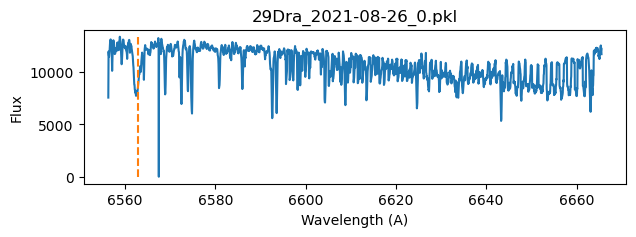

minimum: 7735.785171885874
maximum: 13125.590103142114
mean 11154.371387447029
min diff 3418.586215561155
max diff 1971.2187156950858
min
inc (array([109], dtype=int64),)
loc 6562


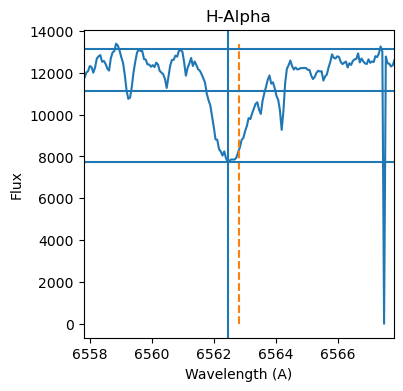

Guess = [3668.586215561155, 6562, 1, 11404.371387447029]
popt = [-4.36824464e+03  6.56260782e+03  5.54867792e-01  1.21651718e+04]


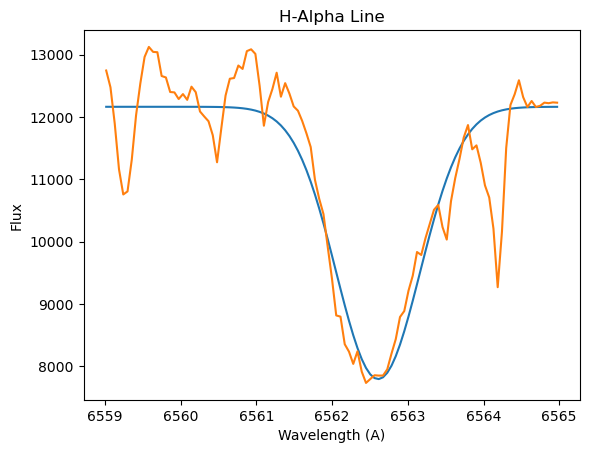

mu_obs = 6562.607822848005
z = -2.9282798804712242e-05
v = -8.77898308165273
B = 12165.17180649955
EW_Ha = 0.4992663398734787

--------------------------------------------------------------------------


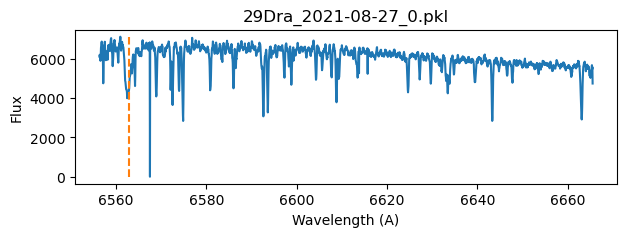

minimum: 3997.860605420023
maximum: 7131.915082935535
mean 5914.485534624763
min diff 1916.62492920474
max diff 1217.4295483107717
min
inc (array([109], dtype=int64),)
loc 6562


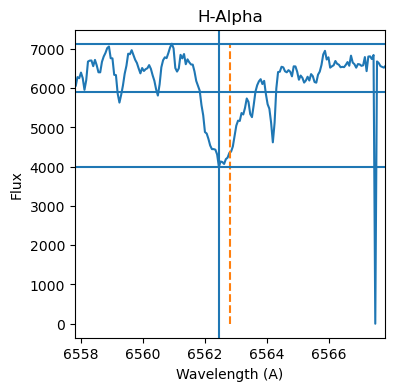

Guess = [2166.62492920474, 6562, 1, 6164.485534624763]
popt = [-2.29376810e+03  6.56261443e+03  5.10311825e-01  6.40255293e+03]


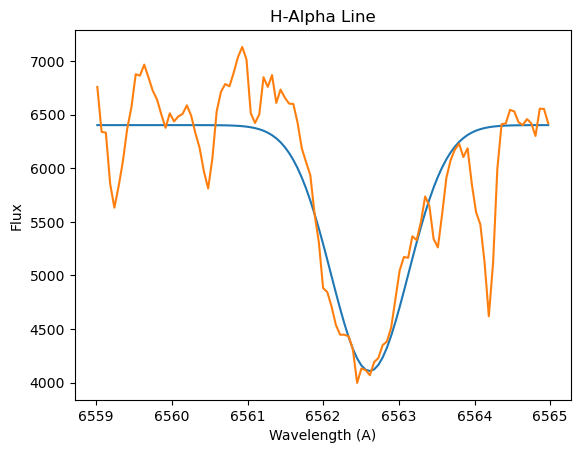

mu_obs = 6562.614433036089
z = -2.8275578093311894e-05
v = -8.477018312374906
B = 6402.552926835439
EW_Ha = 0.45822977770264073

--------------------------------------------------------------------------


In [14]:
p0g = [[3000, 6561.5, 2, 4000],
       [1500, 6562.5, 2, 2000],
       [1200, 6562.5, 2.5, 1500],
       [1200, 6561.5, 2, 1400]]


lims = [6558, 6566]

EWs = [[] for i in range (len(stardata)-1)]

for k in range (len(stardata)-1):
    #print(folder_path+"/"+stardata[i+1][0])

    spec = pkl.load(open(folder_path+"/"+stardata[k+1][0], 'rb'))
    '''print(spec['wav'].shape)
    for i in range(spec['wav'].shape[0]):
        print(i,spec['wav'][i,0],spec['wav'][i,-1])'''
    o_ha = 39
    l_ha= 6562.8
    fig,ax = plt.subplots(figsize = (7,2))
    ax.plot(spec['wav'][o_ha],spec['flux'][o_ha])
    ax.plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
    ax.set_ylabel('Flux')
    ax.set_xlabel('Wavelength (A)')
    ax.set_title(stardata[k+1][0])
    plt.show()

    Ha_where = np.where((spec['wav'][o_ha]>lims[0]) & (spec['wav'][o_ha]<lims[1]))

#####################

    #print(Ha_where)
    mini = min(spec['flux'][o_ha][Ha_where])
    maxi = max(spec['flux'][o_ha][Ha_where])
    print("minimum:", mini)
    print("maximum:", maxi)


    
    meanf = np.mean(spec['flux'][o_ha][Ha_where])
    print("mean", meanf)
    
    print("min diff", np.abs(meanf - mini))
    print("max diff", np.abs(meanf- maxi))
    if (np.abs(mini-meanf)) > (np.abs(maxi-meanf)):
        amp = np.abs(mini-meanf)
        inc = np.where(spec['flux'][o_ha] == mini)
        print("min")
    else:
        amp = np.abs(maxi-meanf)
        inc = np.where(spec['flux'][o_ha] == maxi)
        print("max")
  
    print("inc", inc)
    loc = int(spec['wav'][o_ha][inc].item())
    print("loc", loc)
    
    correction = 250
    
    pog = [amp + correction, loc, 1, meanf + correction]


    
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax.plot(spec['wav'][o_ha],spec['flux'][o_ha])
    ax.set_ylabel('Flux')
    ax.set_xlabel('Wavelength (A)')
    ax.plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
    ax.set_xlim(l_ha-5, l_ha+5)

    ax.axvline(spec['wav'][o_ha][inc])
    ax.axhline(meanf)
    ax.axhline(mini)
    ax.axhline(maxi)
    
    ax.set_title("H-Alpha")
    plt.show()

    def gauss(x, *p):
        A, mu, sigma, B = p
        return  A * np.exp(-((x-mu)**2) /(2 * sigma**2)) + B
        
    
    #select wavelength range of ~6559 A to ~6565 A
    pguess = [200, 6563, 2, 1750]
    pguess = pog
    print("Guess =", pguess)
    popt, pcov = curve_fit(gauss, spec['wav'][o_ha][Ha_where], spec['flux'][o_ha][Ha_where], p0 = pguess, maxfev=5000)

    print("popt =", popt)
    
    plt.plot(spec['wav'][o_ha][Ha_where], gauss(spec['wav'][o_ha][Ha_where], *popt))
    plt.plot(spec['wav'][o_ha][Ha_where], spec['flux'][o_ha][Ha_where])
    plt.ylabel("Flux")
    plt.xlabel("Wavelength (A)")
    #plt.xlim(6560, 6564.5)
    #plt.ylim(1400, 2200)
    plt.title("H-Alpha Line")
    plt.show()

    
    print("mu_obs =", popt[1])
    mu_obs = popt[1]
    mu_emit = 6562.8

    z = (mu_obs - mu_emit)/(mu_emit)

    print("z =", z)
    c = 2.998e+5
    v = z * c
    print("v =", v)
    print("B =", popt[3])
    
    upperlam = mu_obs+2
    lowerlam = mu_obs-2


    
    IntHa = quad(gauss, lowerlam, upperlam, args = (popt[0], popt[1], popt[2],popt[3]))
    B = popt[3]
    Int1 = (upperlam - lowerlam)
    Int2 = IntHa[0]/B
    IntHA = Int1-Int2

    print("EW_Ha =",  IntHA)
    EWs[k].extend([IntHA])
    print()
    print("--------------------------------------------------------------------------")

In [13]:
for i in range (len(EWs)):
    print(EWs[i])
print("Mean:", np.mean(EWs))

[0.4726791455061057]
[0.5034600485299463]
[0.6068658832254505]
[0.5217900670608491]
[0.4738427111626127]
Mean: 0.5157275710969929
